In [2]:
file_prefix <- "ch18.1"
reuse_fit <- T
source("preset.R")
library(GGally)

In [3]:
input_file <- "data/Guber1999data.csv"
x_names <- c("Spend", "PrcntTake")
y_name <- "SATT"
coeff_names <- map_chr(1:length(x_names), ~"beta_" %+% .x)

# data

In [4]:
data <- read_csv(input_file)
stan_data <- list(
  N = nrow(data), 
  K = length(x_names), 
  x = data %>% select(x_names) %>% as.matrix(),
  y = data[[y_name]]
)

Parsed with column specification:
cols(
  State = col_character(),
  Spend = col_double(),
  StuTeaRat = col_double(),
  Salary = col_double(),
  PrcntTake = col_double(),
  SATV = col_double(),
  SATM = col_double(),
  SATT = col_double()
)



# fit

In [5]:
fit <- stan(file = "model/ch18.1.stan", data = stan_data, seed = 123, 
            pars = c("nu_minus1"), include = F, 
            chains = 4, warmup = 300, iter = 10000, thin = 2) 

In [6]:
save(fit, file = save_file_name("fit"))
load(file = save_file_name("fit"))

In [7]:
fit

Inference for Stan model: ch18.
4 chains, each with iter=10000; warmup=300; thin=2; 
post-warmup draws per chain=4850, total post-warmup draws=19400.

           mean se_mean    sd    2.5%     25%     50%     75%   97.5% n_eff
alpha    991.31    0.19 22.59  946.29  976.30  991.41 1006.11 1036.16 13530
beta[1]   12.88    0.04  4.39    4.24    9.96   12.89   15.79   21.55 12807
beta[2]   -2.88    0.00  0.22   -3.32   -3.03   -2.88   -2.73   -2.44 14653
sigma     31.49    0.03  3.89   24.24   28.91   31.32   33.89   39.70 15624
nu        33.29    0.22 28.88    4.24   12.87   24.56   44.29  110.93 17300
lp__    -211.50    0.01  1.62 -215.46 -212.35 -211.15 -210.31 -209.36 13170
        Rhat
alpha      1
beta[1]    1
beta[2]    1
sigma      1
nu         1
lp__       1

Samples were drawn using NUTS(diag_e) at Wed Jan 15 23:20:38 2020.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat

In [ ]:
#ggs_traceplot(ggs(fit, inc_warmup = F))

# result

In [8]:
res <- fit_to_tibble(fit) %>% 
  mutate(log_nu = log10(nu)) %>% 
  add_linear_regression_Rsq(data, coeff_names, x_names, y_name)

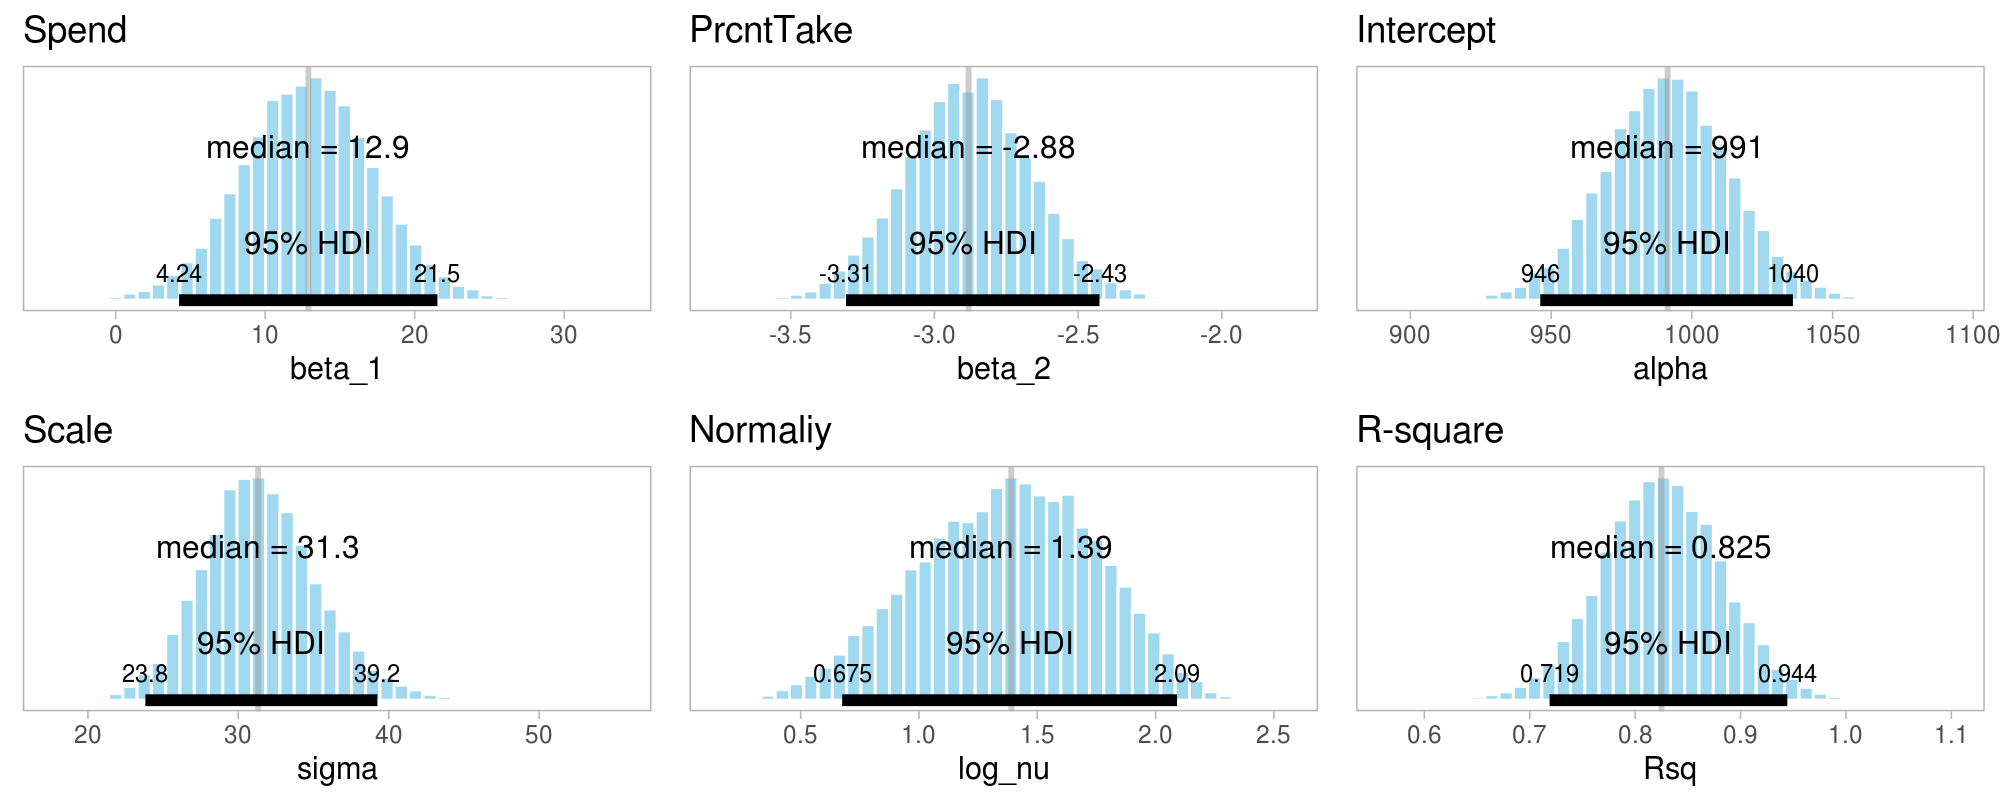

In [13]:
# Figure18.5
set_plot_size(10, 4)
grid.arrange(
  grobs = map2(
    c(coeff_names, "alpha", "sigma", "log_nu", "Rsq"), 
    c(x_names, "Intercept", "Scale", "Normaliy", "R-square"), 
    ~plot_post(res, param_name = .x, title = .y)), 
  ncol = 3
)

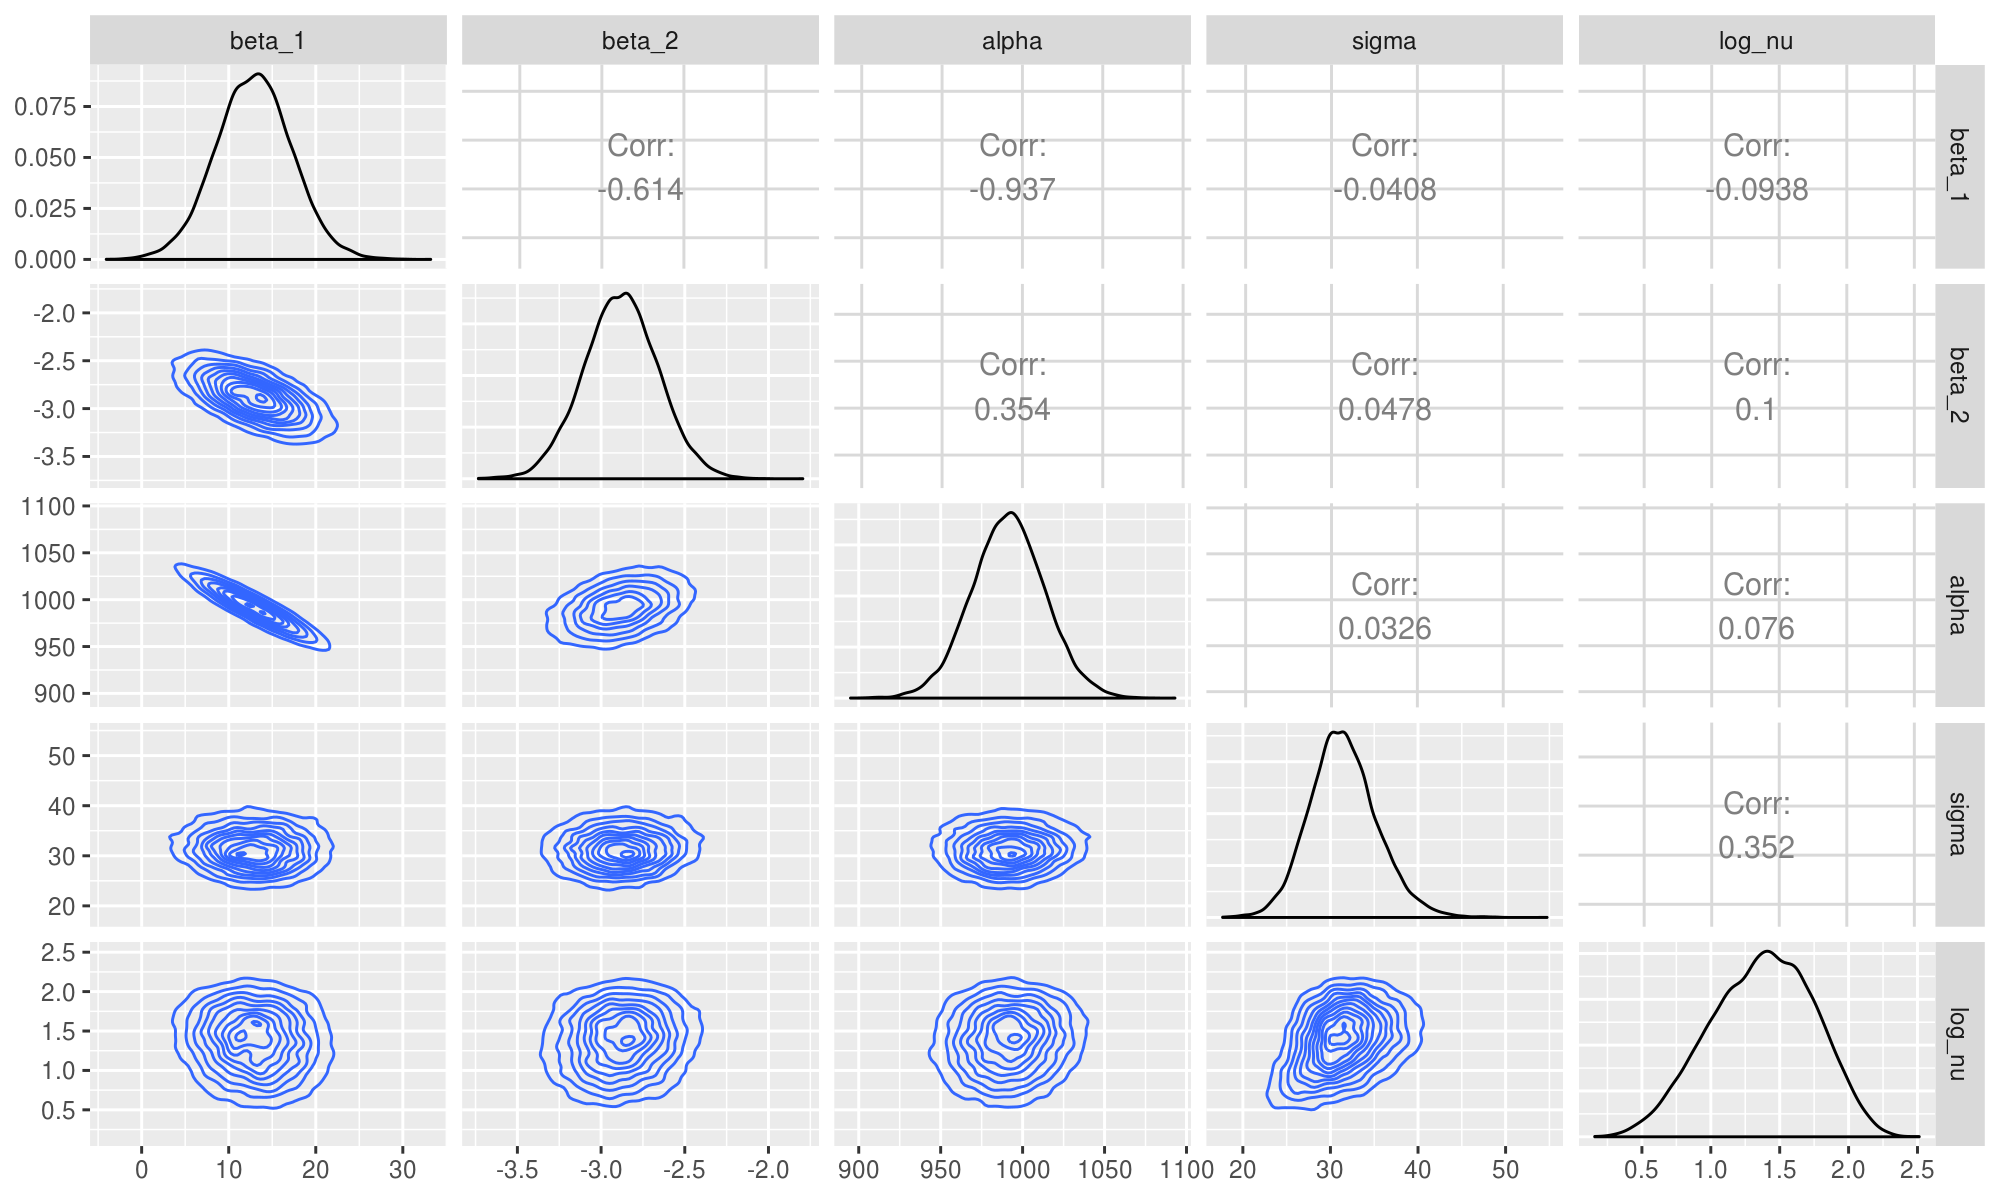

In [12]:
set_plot_size(10, 6)
res %>% select(coeff_names, "alpha", "sigma", "log_nu") %>% 
  ggpairs(lower = list(continuous = "density")) 